# nuScenes devkit tutorial

Welcome to the nuScenes tutorial. This demo assumes the database itself is available at `/data/sets/nuscenes`, and loads a mini version of the full dataset.

## A Gentle Introduction to nuScenes

In this part of the tutorial, let us go through a top-down introduction of our database. Our dataset comprises of elemental building blocks that are the following:

1. `log` - Log information from which the data was extracted.
2. `scene` - 20 second snippet of a car's journey.
3. `sample` - An annotated snapshot of a scene at a particular timestamp.
4. `sample_data` - Data collected from a particular sensor.
5. `ego_pose` - Ego vehicle poses at a particular timestamp.
6. `sensor` - A specific sensor type.
7. `calibrated sensor` - Definition of a particular sensor as calibrated on a particular vehicle.
8. `instance` - Enumeration of all object instance we observed.
9. `category` - Taxonomy of object categories (e.g. vehicle, human). 
10. `attribute` - Property of an instance that can change while the category remains the same.
11. `visibility` - Fraction of pixels visible in all the images collected from 6 different cameras.
12. `sample_annotation` - An annotated instance of an object within our interest.
13. `map` - Map data that is stored as binary semantic masks from a top-down view.

The database schema is visualized below. For more information see the [nuScenes schema](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/schema_nuscenes.md) page.
![](https://www.nuscenes.org/public/images/nuscenes-schema.svg)

## Google Colab (optional)

<br>
<a href="https://colab.research.google.com/github/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorials/nuscenes_tutorial.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left">
</a>
<br>

If you are running this notebook in Google Colab, you can uncomment the cell below and run it; everything will be set up nicely for you. Otherwise, manually set up everything.

In [1]:
# !mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

# !wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

# !tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.

# !pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

## Initialization

In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='../nuscenes-racecar/', verbose=True)

Loading NuScenes tables for version v1.0-mini...
1 category,
1 attribute,
1 visibility,
1 instance,
11 sensor,
148 calibrated_sensor,
369264 ego_pose,
22 log,
22 scene,
38108 sample,
1491862 sample_data,
1 sample_annotation,
2 map,
Done loading in 17.353 seconds.
Reverse indexing ...
Done reverse indexing in 8.1 seconds.


## A look at the dataset

### 1. `scene`

nuScenes is a large scale database that features annotated samples across ***1000 scenes*** of approximately 20 seconds each. Let's take a look at the scenes that we have in the loaded database.

In [3]:
nusc.list_scenes()

SOLO-SLOW-70, Solo laps at speeds below 70 mph [70-01-01 04:32:25]    0s, IMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
PYLON, Solo laps with pylon avoidance [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-FAST-140, Solo laps above 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-SLOW-70, Solo laps below 70 mph [70-01-01 04:33:16]    0s, LVMS, #anns:0
SOLO-SLOW-70, Solo laps below 70 mph [70-01-01 04:33:27]    0s, LVMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:33:27]    0s, LVMS, #anns:0
SOLO-SLOW-70-100, Solo laps between 70 and 100 mph [70-01-01 04:33:28]    0s, LVMS, #anns:0
MULTI-SLOW-KAIST, Low speed multi-agent laps with KAIST [70-01-01 04:33:31]    0s, LVMS, #anns:0
MULTI-SLOW-MIT, Low speed multi-agent laps with MIT... [70-01-01 04:33:31]    0s, LVMS, #anns:0
MULTI-SLOW-TUM, Low speed multi-age

Let's look at a scene metadata

In [4]:
my_scene = nusc.scene[3]
my_scene

{'description': 'Low speed multi-agent laps with KAIST',
 'first_sample_token': '8a0e922c2c770a19b67fcc9080230cd9',
 'last_sample_token': '29fe135ff8a313e783d64343c9f2ebc1',
 'log_token': '9009abc0d5690500b6de6a8596542e5b',
 'name': 'MULTI-SLOW-KAIST',
 'nbr_samples': 1399,
 'token': '6e7f0ab26296caf7066d2fdaffe0bb91'}

### 2. `sample`

In scenes, we sample our data every half a second (2 Hz).

We define `sample` as a ***keyframe of a scene at a given timestamp***. A keyframe is a frame where the time-stamps of data from all the sensors should be very close to the time-stamp of the sample it points to.

Now, let us look at the first sample in this scene.

In [5]:
first_sample_token = my_scene['first_sample_token']

# The rendering command below is commented out because it tends to crash in notebooks
# nusc.render_sample(first_sample_token)

Let's examine its metadata

In [6]:
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'next': 'f55901ad60666671d4f3f888eed0c2cb',
 'prev': '',
 'scene_token': '6e7f0ab26296caf7066d2fdaffe0bb91',
 'timestamp': 16411636005.000483,
 'token': '8a0e922c2c770a19b67fcc9080230cd9',
 'data': {'RADAR_FRONT': '9ee88efbe4f584a855eb53175d6de098',
  'CAMERA_REAR_RIGHT': 'fc29f65d890e17f1dcc5645f12c5c76b',
  'LIDAR_FRONT': '39e1e042ab59c68ff2bd34a0bb0e3936',
  'LIDAR_RIGHT': '543269ae8ba119270c23d25ec3f8d092',
  'LIDAR_LEFT': '01f3d2f4a5883a5480795b65f19cf3b0',
  'CAMERA_FRONT_LEFT_CENTER': 'f58f9a41fceb4f1dd8b14950c01d19b0',
  'CAMERA_REAR_LEFT': 'b69343132bd85333b8fcb2dc8f5d37ce',
  'CAMERA_FRONT_LEFT': '1e87d25854325603a0d1664ff0585e56',
  'CAMERA_FRONT_RIGHT': 'fb7cff90615ca7fc442bd8d70d319f18'},
 'anns': []}

A useful method is  `list_sample()` which lists all related `sample_data` keyframes and `sample_annotation` associated with a `sample` which we will discuss in detail in the subsequent parts.

In [7]:
nusc.list_sample(my_sample['token'])

Sample: 8a0e922c2c770a19b67fcc9080230cd9

sample_data_token: 9ee88efbe4f584a855eb53175d6de098, mod: radar, channel: RADAR_FRONT
sample_data_token: fc29f65d890e17f1dcc5645f12c5c76b, mod: camera, channel: CAMERA_REAR_RIGHT
sample_data_token: 39e1e042ab59c68ff2bd34a0bb0e3936, mod: lidar, channel: LIDAR_FRONT
sample_data_token: 543269ae8ba119270c23d25ec3f8d092, mod: lidar, channel: LIDAR_RIGHT
sample_data_token: 01f3d2f4a5883a5480795b65f19cf3b0, mod: lidar, channel: LIDAR_LEFT
sample_data_token: f58f9a41fceb4f1dd8b14950c01d19b0, mod: camera, channel: CAMERA_FRONT_LEFT_CENTER
sample_data_token: b69343132bd85333b8fcb2dc8f5d37ce, mod: camera, channel: CAMERA_REAR_LEFT
sample_data_token: 1e87d25854325603a0d1664ff0585e56, mod: camera, channel: CAMERA_FRONT_LEFT
sample_data_token: fb7cff90615ca7fc442bd8d70d319f18, mod: camera, channel: CAMERA_FRONT_RIGHT



### 3. `sample_data`

The nuScenes dataset contains data that is collected from a full sensor suite. Hence, for each snapshot of a scene, we provide references to a family of data that is collected from these sensors. 

We provide a `data` key to access these:

In [8]:
my_sample['data']

{'RADAR_FRONT': '9ee88efbe4f584a855eb53175d6de098',
 'CAMERA_REAR_RIGHT': 'fc29f65d890e17f1dcc5645f12c5c76b',
 'LIDAR_FRONT': '39e1e042ab59c68ff2bd34a0bb0e3936',
 'LIDAR_RIGHT': '543269ae8ba119270c23d25ec3f8d092',
 'LIDAR_LEFT': '01f3d2f4a5883a5480795b65f19cf3b0',
 'CAMERA_FRONT_LEFT_CENTER': 'f58f9a41fceb4f1dd8b14950c01d19b0',
 'CAMERA_REAR_LEFT': 'b69343132bd85333b8fcb2dc8f5d37ce',
 'CAMERA_FRONT_LEFT': '1e87d25854325603a0d1664ff0585e56',
 'CAMERA_FRONT_RIGHT': 'fb7cff90615ca7fc442bd8d70d319f18'}

Notice that the keys are referring to the different sensors that form our sensor suite. Let's take a look at the metadata of a `sample_data` taken from `CAM_FRONT`.

In [9]:
sensor = 'CAMERA_FRONT_LEFT_CENTER'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'calibrated_sensor_token': 'e3f7d48d078569231d466962a80b1bcf',
 'ego_pose_token': 'dc134688a204479c272876767d614061',
 'fileformat': 'jpg',
 'filename': 'samples/CAMERA_FRONT_LEFT_CENTER/MULTI-SLOW-KAIST__CAMERA_FRONT_LEFT_CENTER__1641163599915935100.jpg',
 'height': 960,
 'is_key_frame': True,
 'next': '1c9c903e0bca4ff74843dcb4df540a71',
 'prev': '',
 'sample_token': '8a0e922c2c770a19b67fcc9080230cd9',
 'timestamp': 16411635999.15935,
 'token': 'f58f9a41fceb4f1dd8b14950c01d19b0',
 'width': 2064,
 'sensor_modality': 'camera',
 'channel': 'CAMERA_FRONT_LEFT_CENTER'}

We can also render the `sample_data` at a particular sensor. 

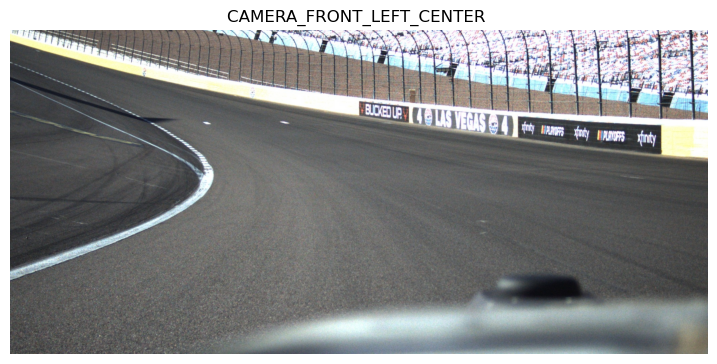

In [10]:
nusc.render_sample_data(cam_front_data['token'])

### 4-8. `Ommited due to dataset not having annotations`

### 9. `sensor`

The RACECAR dataset consists of data collected from our full sensor suite which consists of:
- 3 x LIDAR, 
- 1 x RADAR, 
- 6 x cameras, 

***Note: Not every sensor is used in each scene.*** 

The 3 LIDAR sensors are used consistently, but the RADAR and cameras vary from scene to scene. Some scenes have also fused the output from the three LIDAR sensors into a single reading and are denoted with the sensor channel `LIDAR_FUSED`.

In [11]:
nusc.sensor

[{'channel': 'LIDAR_FRONT',
  'modality': 'lidar',
  'token': '86a41f36e1700f957f36cf52a0590528'},
 {'channel': 'LIDAR_LEFT',
  'modality': 'lidar',
  'token': '08f4d1ddfb90dae796f4185c1a126e66'},
 {'channel': 'LIDAR_RIGHT',
  'modality': 'lidar',
  'token': 'a31a6dc3ff558558817257f193456500'},
 {'channel': 'RADAR_FRONT',
  'modality': 'radar',
  'token': '2432b488c210410561b02018237366c9'},
 {'channel': 'CAMERA_REAR_LEFT',
  'modality': 'camera',
  'token': 'c8517f3999746d7c2f69a2b75c1032df'},
 {'channel': 'CAMERA_FRONT_RIGHT_CENTER',
  'modality': 'camera',
  'token': 'a20123abc202f7f165b1768d29d5ba45'},
 {'channel': 'CAMERA_REAR_RIGHT',
  'modality': 'camera',
  'token': '422b3ce674889c03b950a375f3b53687'},
 {'channel': 'CAMERA_FRONT_RIGHT',
  'modality': 'camera',
  'token': '8a2b611d5a6f6622072abafadaf11789'},
 {'channel': 'CAMERA_FRONT_LEFT_CENTER',
  'modality': 'camera',
  'token': '2eb675e743dd7e021c27c7880b434f26'},
 {'channel': 'CAMERA_FRONT_LEFT',
  'modality': 'camera',
  

Every `sample_data` has a record on which `sensor` the data is collected from (note the "channel" key)

In [12]:
nusc.sample_data[0]

{'calibrated_sensor_token': '390cba50cb07fc308fe3b5e5f4bee061',
 'ego_pose_token': 'e393ef8fe703778f7a3574ff6eddfcbd',
 'fileformat': 'pcd.bin',
 'filename': 'samples/LIDAR_FRONT/SOLO-FAST-100-140__LIDAR_FRONT__16415836904071168.pcd.bin',
 'height': 0,
 'is_key_frame': True,
 'next': 'a036f60f0af9e490cff3bf575130e768',
 'prev': '',
 'sample_token': '5933c81af5e770dffbbcf61fd9b37acc',
 'timestamp': 164158369.04071167,
 'token': '993792a94260b3bc1cbebc6baa65f958',
 'width': 0,
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_FRONT'}

### 10. `calibrated_sensor`

`calibrated_sensor` consists of the definition of a particular sensor (lidar/radar/camera) as calibrated on a particular vehicle. Let us look at an example.

In [13]:
nusc.calibrated_sensor[0]

{'camera_intrinsic': [],
 'rotation': [1.0, 0.0, 0.0, 0.0],
 'sensor_token': '86a41f36e1700f957f36cf52a0590528',
 'token': '390cba50cb07fc308fe3b5e5f4bee061',
 'translation': [2.3420000076293945, 0.0, 0.4480000138282776]}

Note that the `translation` and the `rotation` parameters are given with respect to the ego vehicle body frame. 

### 11. `ego_pose`

`ego_pose` contains information about the location (encoded in `translation`) and the orientation (encoded in `rotation`) of the ego vehicle, with respect to the global coordinate system.

In [14]:
nusc.ego_pose[0]

{'rotation': [0.9997795542762551, 0.0, 0.0, -0.020996258027869995],
 'timestamp': 1641583690.482943,
 'token': 'e393ef8fe703778f7a3574ff6eddfcbd',
 'translation': [-85.8316512600859, 225.65717804241118, 2.1135333589095016]}

Note that the number of `ego_pose` records in our loaded database is the same as the number of `sample_data` records. These two records exhibit a one-to-one correspondence.

### 12. `log`

The `log` table contains log information from which the data was extracted. A `log` record corresponds to one journey of our ego vehicle along a predefined route. Let's check the number of logs and the metadata of a log.

In [15]:
print("Number of `logs` in our loaded database: {}".format(len(nusc.log)))

Number of `logs` in our loaded database: 22


In [16]:
nusc.log[0]

{'date_captured': '2022-01-07',
 'location': 'LVMS',
 'logfile': 'SOLO-FAST-100-140',
 'token': 'b2c2478b05990625f7aeddacca256411',
 'vehicle': 'MIT-PITT-RW',
 'map_token': '7e3b5b651fe150647024ed0a72fe70fe'}

Notice that it contains a variety of information such as the date and location of the log collected. It also gives out information about the map from where the data was collected. Note that one log can contain multiple non-overlapping scenes.

### 13. `map`

Map information is stored as binary semantic masks from a top-down view. Let's check the number of maps and metadata of a map.

In [17]:
print("There are {} maps masks in the loaded dataset".format(len(nusc.map)))

There are 2 maps masks in the loaded dataset


In [18]:
nusc.map[0]

{'category': 'LVMS',
 'filename': '',
 'log_tokens': ['b2c2478b05990625f7aeddacca256411',
  'd95fec9ccb762b37f43dedbf8e56eacb',
  'b90d57de1e87976f041acb288999b0b6',
  '9009abc0d5690500b6de6a8596542e5b',
  '0194ad49878c8290e661b26b1ec3b53b',
  'f83d806b9db6984c9f5f4f6cadb1087f',
  'ed48c97478c9fdd7e0eba655829dcc8a',
  'd7e7da27ada6274900acd8ed6eca9cc6',
  '2817af5c0f9ecb1071633e6062924cb6',
  '88be1f42d72331ed4ad44e5a2870199a',
  'd819bcc42e89e69417eefda4e8bf4dc1',
  'c7e7e8b350900892ff2aea0c6504b977',
  '46a381e3cc8159d084fb063e25a7af8e',
  '634fc63aa088dc388b2e9a7bdfab5b5b',
  '2a314f98cdcd5052c882d45553e56bc9',
  '43cb14ac46e72f16f00d03f1c5423797',
  'dc8d10746275e0ed29fe4862d604f70c'],
 'token': '7e3b5b651fe150647024ed0a72fe70fe',
 'mask': <nuscenes.utils.map_mask.MapMask at 0x7f44886e2050>}

## nuScenes Basics

Let's get a bit technical.

The NuScenes class holds several tables. Each table is a list of records, and each record is a dictionary. For example the first record of the sensor table is stored at:

In [19]:
nusc.sensor[0]

{'channel': 'LIDAR_FRONT',
 'modality': 'lidar',
 'token': '86a41f36e1700f957f36cf52a0590528'}

The sensor table is simple: it holds the fields `modality` and `channel`. It also has a `token` field, which is a unique record identifier. Since the record is a dictionary, the token can be accessed like so:

In [20]:
sensor_token = nusc.sensor[0]['token']
sensor_token

'86a41f36e1700f957f36cf52a0590528'

If you know the `token` for any record in the DB you can retrieve the record by doing

In [21]:
nusc.get('sensor', sensor_token)

{'channel': 'LIDAR_FRONT',
 'modality': 'lidar',
 'token': '86a41f36e1700f957f36cf52a0590528'}

_As you can notice, we have recovered the same record!_

OK, that was easy. Let's try something harder. Let's look at the `sample_data` table.

In [22]:
nusc.sample_data[0]

{'calibrated_sensor_token': '390cba50cb07fc308fe3b5e5f4bee061',
 'ego_pose_token': 'e393ef8fe703778f7a3574ff6eddfcbd',
 'fileformat': 'pcd.bin',
 'filename': 'samples/LIDAR_FRONT/SOLO-FAST-100-140__LIDAR_FRONT__16415836904071168.pcd.bin',
 'height': 0,
 'is_key_frame': True,
 'next': 'a036f60f0af9e490cff3bf575130e768',
 'prev': '',
 'sample_token': '5933c81af5e770dffbbcf61fd9b37acc',
 'timestamp': 164158369.04071167,
 'token': '993792a94260b3bc1cbebc6baa65f958',
 'width': 0,
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_FRONT'}

This also has a `token` field (they all do). In addition, it has several fields of the format [a-z]*\_token, _e.g._ calibrated_sensor_token. These are foreign keys in database terminology, meaning they point to another table. 
Using `nusc.get()` we can grab any of these in constant time. For example, let's look at the calibrated sensor record.

In [23]:
nusc.get('calibrated_sensor', nusc.sample_data[0]['calibrated_sensor_token'])

{'camera_intrinsic': [],
 'rotation': [1.0, 0.0, 0.0, 0.0],
 'sensor_token': '86a41f36e1700f957f36cf52a0590528',
 'token': '390cba50cb07fc308fe3b5e5f4bee061',
 'translation': [0.0, 0.0, 0.0]}

The calibrated sensor records indicate which sensor the sample data was received from.

Let's also grab the `sample_token`

In [24]:
one_sample = nusc.get('sample', nusc.sample_data[0]['sample_token'])
one_sample

{'next': 'bccccf3a0aa09350286e7b02c5bcbd46',
 'prev': '',
 'scene_token': '3f0071a679de9ad85854f63cfe069c2c',
 'timestamp': 16415836905.004292,
 'token': '5933c81af5e770dffbbcf61fd9b37acc',
 'data': {'LIDAR_FRONT': '993792a94260b3bc1cbebc6baa65f958',
  'LIDAR_LEFT': '96d5125de55d18d97cd31b8003ee44fd',
  'LIDAR_RIGHT': '91d897465e4c5cb81cc260242158e4a8',
  'RADAR_FRONT': '731686aa0a2661ded7c83f607cb3cf63'},
 'anns': []}

This points to the `sample_token` table. This table enumerate the object samples collected in each scene.

If you look carefully at the README tables, you will see that the sample_data table points to the sample table, 
but the sample table doesn't list all sample_data that point to it. 

So how can we recover all sample_data for a particular sample?

`Use nusc.field2token()`. Let's try it:

In [25]:
sample_data_tokens = nusc.field2token('sample_data', 'sample_token', one_sample['token'])

This returns a list of all sample_data records with the `'sample_token'` == `one_sample['token']`. Let's store these in a set for now

In [26]:
sample_data_tokens_field2token = set(sample_data_tokens)

sample_data_tokens_field2token

{'0188949bb8dd84def73253370cd64d34',
 '04084962cb6b2de51cb2228d810fe42f',
 '0411c3b0b78a4570e0b8ebbffee48708',
 '12a24d4fe8effa9def812c1023d4cc9e',
 '1e84fa603e25542e51fcce5e84c930a5',
 '242698192f3b930ad653b1a53dd0ac9d',
 '28222b25c33a383e92898c8c2986a2ec',
 '2dcd5c081e40238cc6e976bcc19914c3',
 '2df9b0a15bf6e8881d89a9559cd8eb61',
 '2fc0fe7050333ad5874c5de76067e650',
 '31eb0a8f311ee049b1faf53f460c41a7',
 '34448421769c3720be591c7b50ba716a',
 '34a030d62927e98857846ec8fc1d3647',
 '38450132b13f17cad46b3330e61d29e5',
 '3d21704bddcd5392bc679d66449187fb',
 '44be853c959d6175f71da5ca1479b82f',
 '4825e98c4f304fc48ee777f4b22063ea',
 '48d966bb8561e6a362e32ca0faf57bcd',
 '4bbb507dcd2bea31813f72b93e3ba46e',
 '5397b0f22d9e8107f33f676a6cbb55ea',
 '5422af82604eae9c9a31c530c5ba6e1c',
 '565112d1c8caa74f07f1afe2bd09888d',
 '610699a580966ee5b5cf909bc968787d',
 '61e5d18918dfab61e34cd8e760946acd',
 '64108ecdf982ade6abd6fe690e218e0e',
 '6ae510277563dd86bf51540e84e09e10',
 '6e9640618baefa05e64af83bd3c949ea',
 

## Reverse indexing and short-cuts

The nuScenes tables are normalized, meaning that each piece of information is only given once.
For example, there is one `map` record for each `log` record. Looking at the schema you will notice that the `map` table has a `log_token` field, but that the `log` table does not have a corresponding `map_token` field. But there are plenty of situations where you have a `log`, and want to find the corresponding `map`! So what to do? You can always use the `nusc.field2token()` method, but that is slow and inconvenient. We therefore add reverse mappings for some common situations including this one.

Further, there are situations where one needs to go through several tables to get a certain piece of information. 
Consider, for example, the category name (e.g. `human.pedestrian`) of a `sample_annotation`. The `sample_annotation` table doesn't hold this information since the category is an instance level constant. Instead the `sample_annotation` table points to a record in the `instance` table. This, in turn, points to a record in the `category` table, where finally the `name` fields stores the required information.

Since it is quite common to want to know the category name of an annotation, we add a `category_name` field to the `sample_annotation` table during initialization of the NuScenes class.

In this section, we list the short-cuts and reverse indices that are added to the `NuScenes` class during initialization. These are all created in the `NuScenes.__make_reverse_index__()` method.

### Reverse indices
We add two reverse indices by default.
* A `map_token` field is added to the `log` records.
* The `sample` records have shortcuts to all `sample_annotations` for that record as well as `sample_data` key-frames. Confer `nusc.list_sample()` method in the previous section for more details on this.

### Shortcuts

The sample_annotation table has a "category_name" shortcut.

_Using shortcut:_

In [27]:
catname = nusc.sample_annotation[0]['category_name']

_Not using shortcut:_

In [28]:
ann_rec = nusc.sample_annotation[0]
inst_rec = nusc.get('instance', ann_rec['instance_token'])
cat_rec = nusc.get('category', inst_rec['category_token'])

print(catname == cat_rec['name'])

True


The sample_data table has "channel" and "sensor_modality" shortcuts:

In [29]:
# Shortcut
channel = nusc.sample_data[0]['channel']

# No shortcut
sd_rec = nusc.sample_data[0]
cs_record = nusc.get('calibrated_sensor', sd_rec['calibrated_sensor_token'])
sensor_record = nusc.get('sensor', cs_record['sensor_token'])

print(channel == sensor_record['channel'])

True


## Data Visualizations

We provide list and rendering methods. These are meant both as convenience methods during development, and as tutorials for building your own visualization methods. They are implemented in the NuScenesExplorer class, with shortcuts through the NuScenes class itself.

### List methods

`list_scenes()` lists all scenes in the loaded DB.

In [30]:
nusc.list_scenes()

SOLO-SLOW-70, Solo laps at speeds below 70 mph [70-01-01 04:32:25]    0s, IMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
PYLON, Solo laps with pylon avoidance [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-FAST-140, Solo laps above 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:32:30]    0s, IMS, #anns:0
SOLO-SLOW-70, Solo laps below 70 mph [70-01-01 04:33:16]    0s, LVMS, #anns:0
SOLO-SLOW-70, Solo laps below 70 mph [70-01-01 04:33:27]    0s, LVMS, #anns:0
SOLO-FAST-100-140, Solo laps between 100 and 140 mph [70-01-01 04:33:27]    0s, LVMS, #anns:0
SOLO-SLOW-70-100, Solo laps between 70 and 100 mph [70-01-01 04:33:28]    0s, LVMS, #anns:0
MULTI-SLOW-KAIST, Low speed multi-agent laps with KAIST [70-01-01 04:33:31]    0s, LVMS, #anns:0
MULTI-SLOW-MIT, Low speed multi-agent laps with MIT... [70-01-01 04:33:31]    0s, LVMS, #anns:0
MULTI-SLOW-TUM, Low speed multi-age

### Render

First, let's plot a lidar point cloud in an image. Lidar allows us to accurately map the surroundings in 3D.

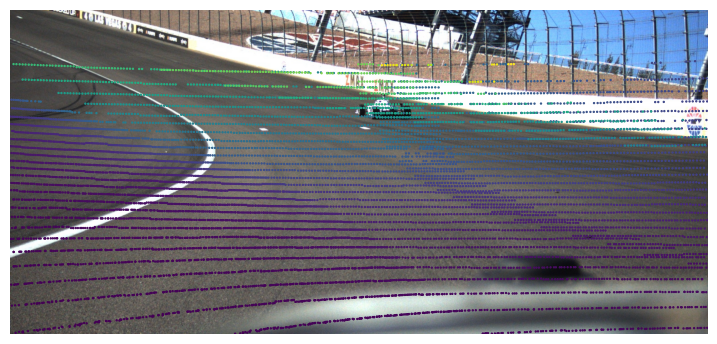

In [31]:
my_sample = nusc.sample[9000]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_FRONT', camera_channel='CAMERA_FRONT_LEFT_CENTER', dot_size=0.5)

In the previous image the colors indicate the distance from the ego vehicle to each lidar point. We can also render the lidar intensity. In the following image the traffic sign ahead of us is highly reflective (yellow) and the dark vehicle on the right has low reflectivity (purple).

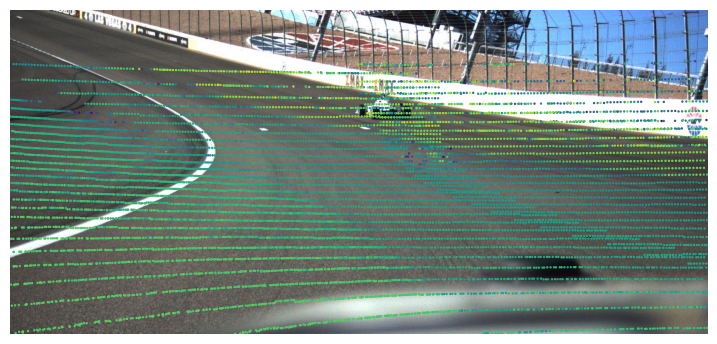

In [32]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_FRONT', camera_channel='CAMERA_FRONT_LEFT_CENTER', dot_size=0.5, render_intensity=True)

Second, let's plot the radar point cloud for the same image. Radar is less dense than lidar, but has a much larger range.

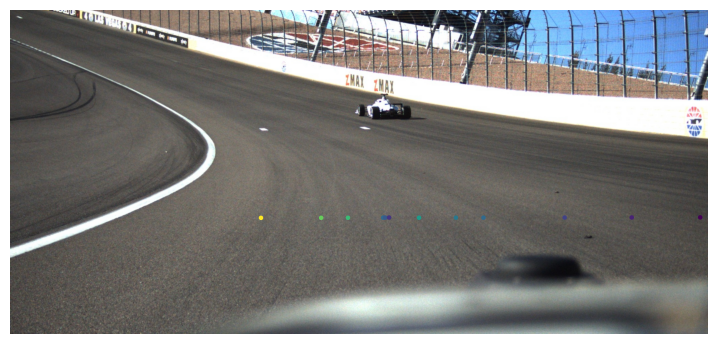

In [33]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT', camera_channel="CAMERA_FRONT_LEFT_CENTER")

Or if we only want to render a particular sensor, we can specify that.

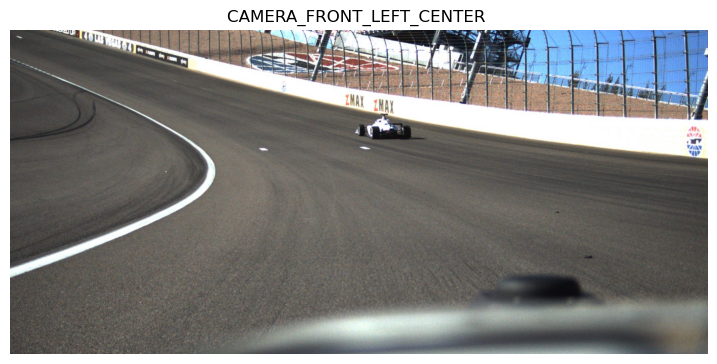

In [34]:
nusc.render_sample_data(my_sample['data']['CAMERA_FRONT_LEFT_CENTER'])

Finally, we can render a full scene as a video. There are two options here:
1. nusc.render_scene_channel() renders the video for a particular channel. (HIT ESC to exit)
2. nusc.render_scene() renders the video for all camera channels.

NOTE: These methods use OpenCV for rendering, which doesn't always play nice with IPython Notebooks. If you experience any issues please run these lines from the command line. 

Let's grab scene 0061, it is nice and dense.

In [35]:
my_scene_token = nusc.field2token('scene', 'name', 'MULTI-SLOW-KAIST')[0]

In [36]:
# The rendering command below is commented out because it may crash in notebooks
# nusc.render_scene_channel(my_scene_token, 'CAM_FRONT')

There is also a method nusc.render_scene() which renders the video for all camera channels. 
This requires a high-res monitor, and is also best run outside this notebook.

In [37]:
# The rendering command below is commented out because it may crash in notebooks
# nusc.render_scene(my_scene_token)